In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt

# Для корректной работы Jupyter Notebook
%matplotlib inline
# Для корректного отображения графиков в тёмной теме
plt.style.use('default')

In [2]:
data = pd.read_csv('data/hotels.csv')

In [3]:
data.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

## Грубая очистка (1) ##

In [5]:
data_dig = data.copy()
data_dig.drop(columns=['hotel_address',
                       'review_date',
                       'hotel_name',
                       'reviewer_nationality',
                       'negative_review',
                       'positive_review',
                       'tags',
                       'days_since_review'
                      ], inplace=True)

In [6]:
data_dig.dropna(axis=0, inplace=True)
# data_dig.fillna(value=0, axis=0)

## Разделение набора данных (1) ##

In [7]:
X = data_dig.drop(['reviewer_score'], axis=1)
y = data_dig['reviewer_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('done')

done


## Создание и обучение модели (1) ##

In [8]:
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('done')

done


## Оценка качества модели (1) ##

In [9]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.14119951423083096


In [62]:
del(data_dig)

###  Задание 4.2 ###

Сколько уникальных названий отелей представлено в наборе данных?

***Ответ - 1492***

In [10]:
data.hotel_name.nunique()

1492

###  Задание 4.3 ###

Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.

***Ответ - 2017-08-03***

Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.

***Ответ - 2015-08-04***

In [11]:
df_dt = data.copy()
df_dt.review_date = pd.to_datetime(df_dt.review_date)
display(df_dt.review_date.min())
display(df_dt.review_date.max())

Timestamp('2015-08-04 00:00:00')

Timestamp('2017-08-03 00:00:00')

###  Задание 4.4 ###

Сколько уникальных тегов представлено в наборе данных?

***Ответ - 2368***

In [59]:
df_tag = data.copy()
tagset = set()
for str_ in df_tag.tags:
    list_ = str_.lstrip('[').rstrip(']').split(', ')
    for tag_ in list_:
        tag_ = tag_.lstrip("\' ").rstrip(" \'")
        tagset.add(tag_)
print(len(tagset))

2368


###  Задание 4.5 ###

Какой тег представлен в наибольшем числе отзывов?

***Ответ - Leisure trip***

In [60]:
tag_dict = dict()
for str_ in df_tag.tags:
    list_ = str_.lstrip('[').rstrip(']').split(', ')
    for tag_ in list_:
        tag_ = tag_.lstrip("\' ").rstrip(" \'")
        if tag_ not in tag_dict:
            tag_dict[tag_] = 1
        else:
            tag_dict[tag_] += 1
max_tag = ''
max_count = 0
for key_, value_ in tag_dict.items():
    if value_ > max_count:
        max_count = value_
        max_tag = key_
print(max_tag)

Leisure trip


###  Задание 4.6 ###

Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.

***Ответ - 1***

In [61]:
for key_, value_ in tag_dict.items():
    if str(key_).startswith('Stayed'):
        print(f'{key_}: {value_}')

Stayed 2 nights: 100263
Stayed 1 night: 145373
Stayed 3 nights: 72000
Stayed 6 nights: 7399
Stayed 4 nights: 35748
Stayed 5 nights: 15611
Stayed 8 nights: 1910
Stayed 7 nights: 5549
Stayed 10 nights: 663
Stayed 14 nights: 184
Stayed 19 nights: 23
Stayed 13 nights: 174
Stayed 9 nights: 966
Stayed 17 nights: 27
Stayed 11 nights: 306
Stayed 27 nights: 10
Stayed 12 nights: 217
Stayed 15 nights: 87
Stayed 21 nights: 19
Stayed 18 nights: 24
Stayed 16 nights: 38
Stayed 26 nights: 6
Stayed 24 nights: 5
Stayed 30 nights: 10
Stayed 22 nights: 8
Stayed 23 nights: 6
Stayed 28 nights: 7
Stayed 20 nights: 17
Stayed 25 nights: 4
Stayed 29 nights: 3


## Повторная очистка (2) ##

In [95]:
df_fine = data.copy()
df_fine.dropna(axis=0, inplace=True)

#### Перевод в числовой вид days_since_review ####

In [96]:
df_fine.days_since_review = df_fine.days_since_review.apply(lambda x: int(x.rstrip(' day').rstrip(' days')))
# df_fine.info()

#### Создание признака stayed_nights ####

In [97]:
def get_stayed_nights(tag):
    tag_list = tag.lstrip('[').rstrip(']').split(', ')
    for tag_ in tag_list:
        tag_ = tag_.lstrip("\' ").rstrip(" \'")
        tag_words = tag_.split()
        if tag_words[0] == 'Stayed':
            return int(tag_words[1])
    return 0

df_fine['stayed_nights'] = df_fine['tags'].apply(get_stayed_nights)

In [98]:
# df_fine.stayed_nights.value_counts()

In [99]:
df_fine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384355 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               384355 non-null  object 
 1   additional_number_of_scoring                384355 non-null  int64  
 2   review_date                                 384355 non-null  object 
 3   average_score                               384355 non-null  float64
 4   hotel_name                                  384355 non-null  object 
 5   reviewer_nationality                        384355 non-null  object 
 6   negative_review                             384355 non-null  object 
 7   review_total_negative_word_counts           384355 non-null  int64  
 8   total_number_of_reviews                     384355 non-null  int64  
 9   positive_review                             384355 non-null  object 
 

In [101]:
df_fine.drop(columns=['hotel_address',
                       'review_date',
                       'hotel_name',
                       'reviewer_nationality',
                       'negative_review',
                       'positive_review',
                       'tags'
                      ], inplace=True)

## Разделение набора данных (2) ##

In [102]:
X = df_fine.drop(['reviewer_score'], axis=1)
y = df_fine['reviewer_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('done')

done


## Создание и обучение модели (2) ##

In [103]:
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('done')

done


## Оценка качества модели (2) ##

In [104]:
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1375397525314954


In [105]:
df_fine.corr()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,lat,lng,stayed_nights
additional_number_of_scoring,1.000000,-0.153742,0.029467,0.824797,-0.052173,-0.071903,-0.062161,0.012779,0.336362,-0.296060,-0.109398
average_score,-0.153742,1.000000,-0.113367,-0.180709,0.106770,0.036572,0.364540,-0.014160,-0.107855,0.106222,0.013864
review_total_negative_word_counts,0.029467,-0.113367,1.000000,0.035224,0.118596,0.001749,-0.383487,-0.041937,0.019346,-0.020870,0.039514
total_number_of_reviews,0.824797,-0.180709,0.035224,1.000000,-0.029423,-0.025798,-0.073587,0.007429,0.100163,-0.014247,-0.034630
review_total_positive_word_counts,-0.052173,0.106770,0.118596,-0.029423,1.000000,0.026648,0.220152,-0.045703,-0.038613,0.035285,0.053645
total_number_of_reviews_reviewer_has_given,-0.071903,0.036572,0.001749,-0.025798,0.026648,1.000000,0.002587,0.035816,-0.059497,0.109414,-0.009019
reviewer_score,-0.062161,0.364540,-0.383487,-0.073587,0.220152,0.002587,1.000000,0.002311,-0.036984,0.034829,-0.015008
days_since_review,0.012779,-0.014160,-0.041937,0.007429,-0.045703,0.035816,0.002311,1.000000,-0.000284,-0.002057,0.000985
lat,0.336362,-0.107855,0.019346,0.100163,-0.038613,-0.059497,-0.036984,-0.000284,1.000000,-0.304338,-0.173323
lng,-0.296060,0.106222,-0.020870,-0.014247,0.035285,0.109414,0.034829,-0.002057,-0.304338,1.000000,0.106981


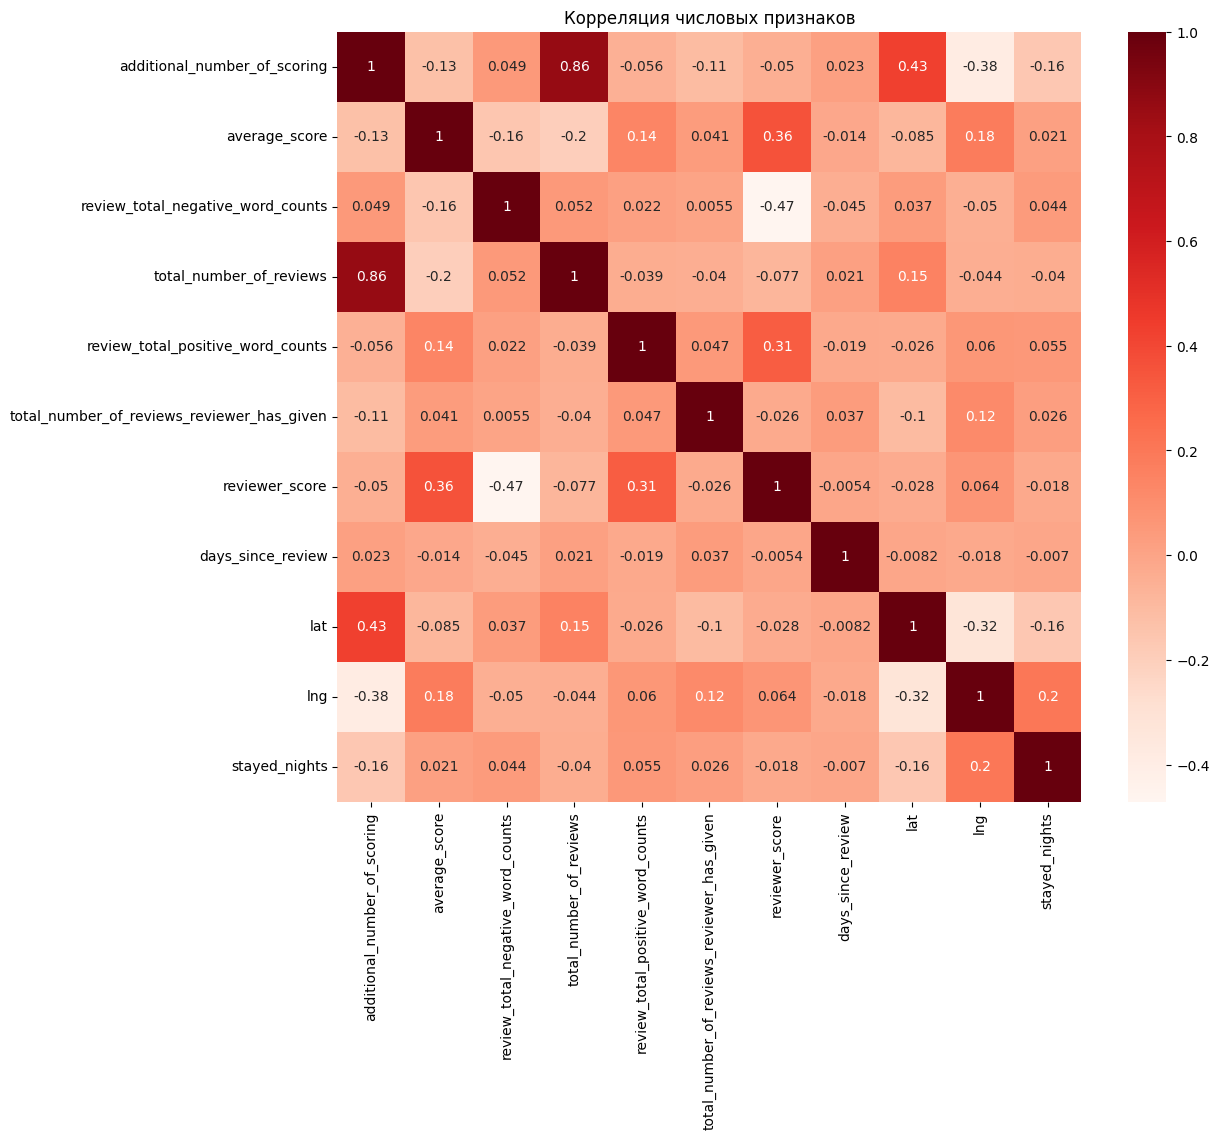

In [112]:
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(data=df_fine.corr(method='spearman'), annot=True, cmap='Reds')
heatmap.set_title('Корреляция числовых признаков')
plt.show()

In [113]:
del(df_fine)